<a href="https://colab.research.google.com/github/ZakariaSoukrat/SkyForcasters/blob/main/Projet_AAA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [134]:
#import of necessary libraries
# sci libraries
import numpy as np
import pandas as pd
import math as m

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

#preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

#metrics and validation
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split

#Data exploration using visualizations, statistics

In [58]:
#Read in Data

# Read the CSV file into a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/ZakariaSoukrat/SkyForcasters/3720e6ecef10a640574d10c9b9e964f69dc213c1/Clean_Dataset.csv")

#data infiormation
print(data.info())
print()
print(data.describe())
print()
# Display the DataFrame
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.00

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [59]:
data.shape

(300153, 12)

We can see that Data set contains 12 colums and 300153 samples :    
The Dataset has enough samples for training and testing ❎

The colums 0 and flight don't have any influence on the price, so we will drop them ❌


In [60]:
#Drop non useful colums
data=data.drop(["Unnamed: 0"],axis=1)
data=data.drop(["flight"],axis=1)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [61]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


we can see that the currency used is not dollar or euro (since the price range is 1105-123071), since the dataSet only includes flights in india we suppose that the devise used is the Indian Rupee,
we know that 1 euro = 91.22 Indian Rupee, we will change that in the Dataset

In [62]:
# #change the currency to euro
# data['price']=data['price']/91.22

In [63]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [64]:
# Check for missing values
print(data.isnull().sum())


airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


we have no missing values ✅

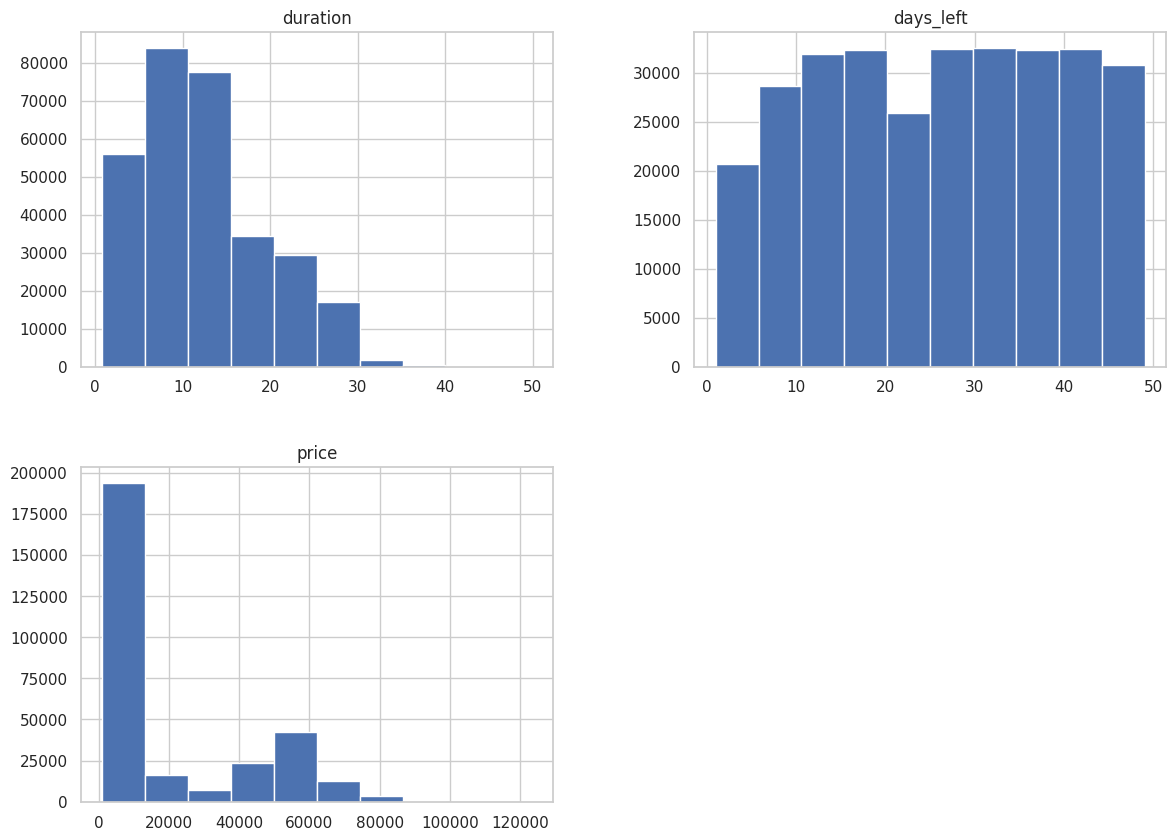

In [65]:
data.hist(bins=10,figsize=(14,10))
plt.show();

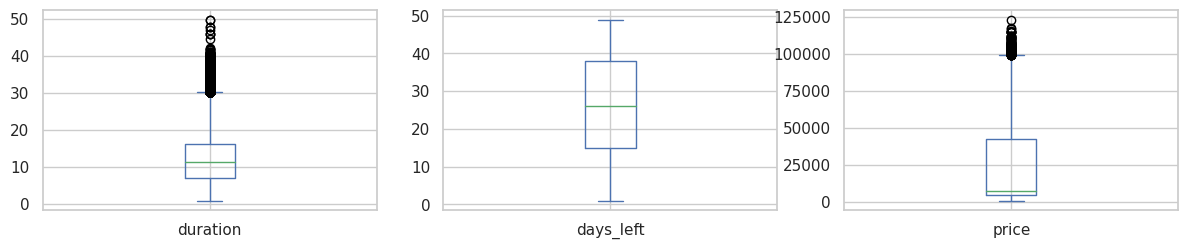

In [66]:
data.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

we can see that we have an uniform distribution for days_left between 1 and 49

most of the flights take 5h to 15h, this is due to the stops that are included in the flight duration (all the flights are in India and we can see flights that take 49h)

the prices are mostly between 13 and 200 euros, which is normal since most of the airlines in India are considerated as low cost

In [67]:
# Display unique values for categorical columns
categorical_cols = ['airline', 'class', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops']
for col in categorical_cols:
    print(col, data[col].unique())



airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
class ['Economy' 'Business']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
stops ['zero' 'one' 'two_or_more']


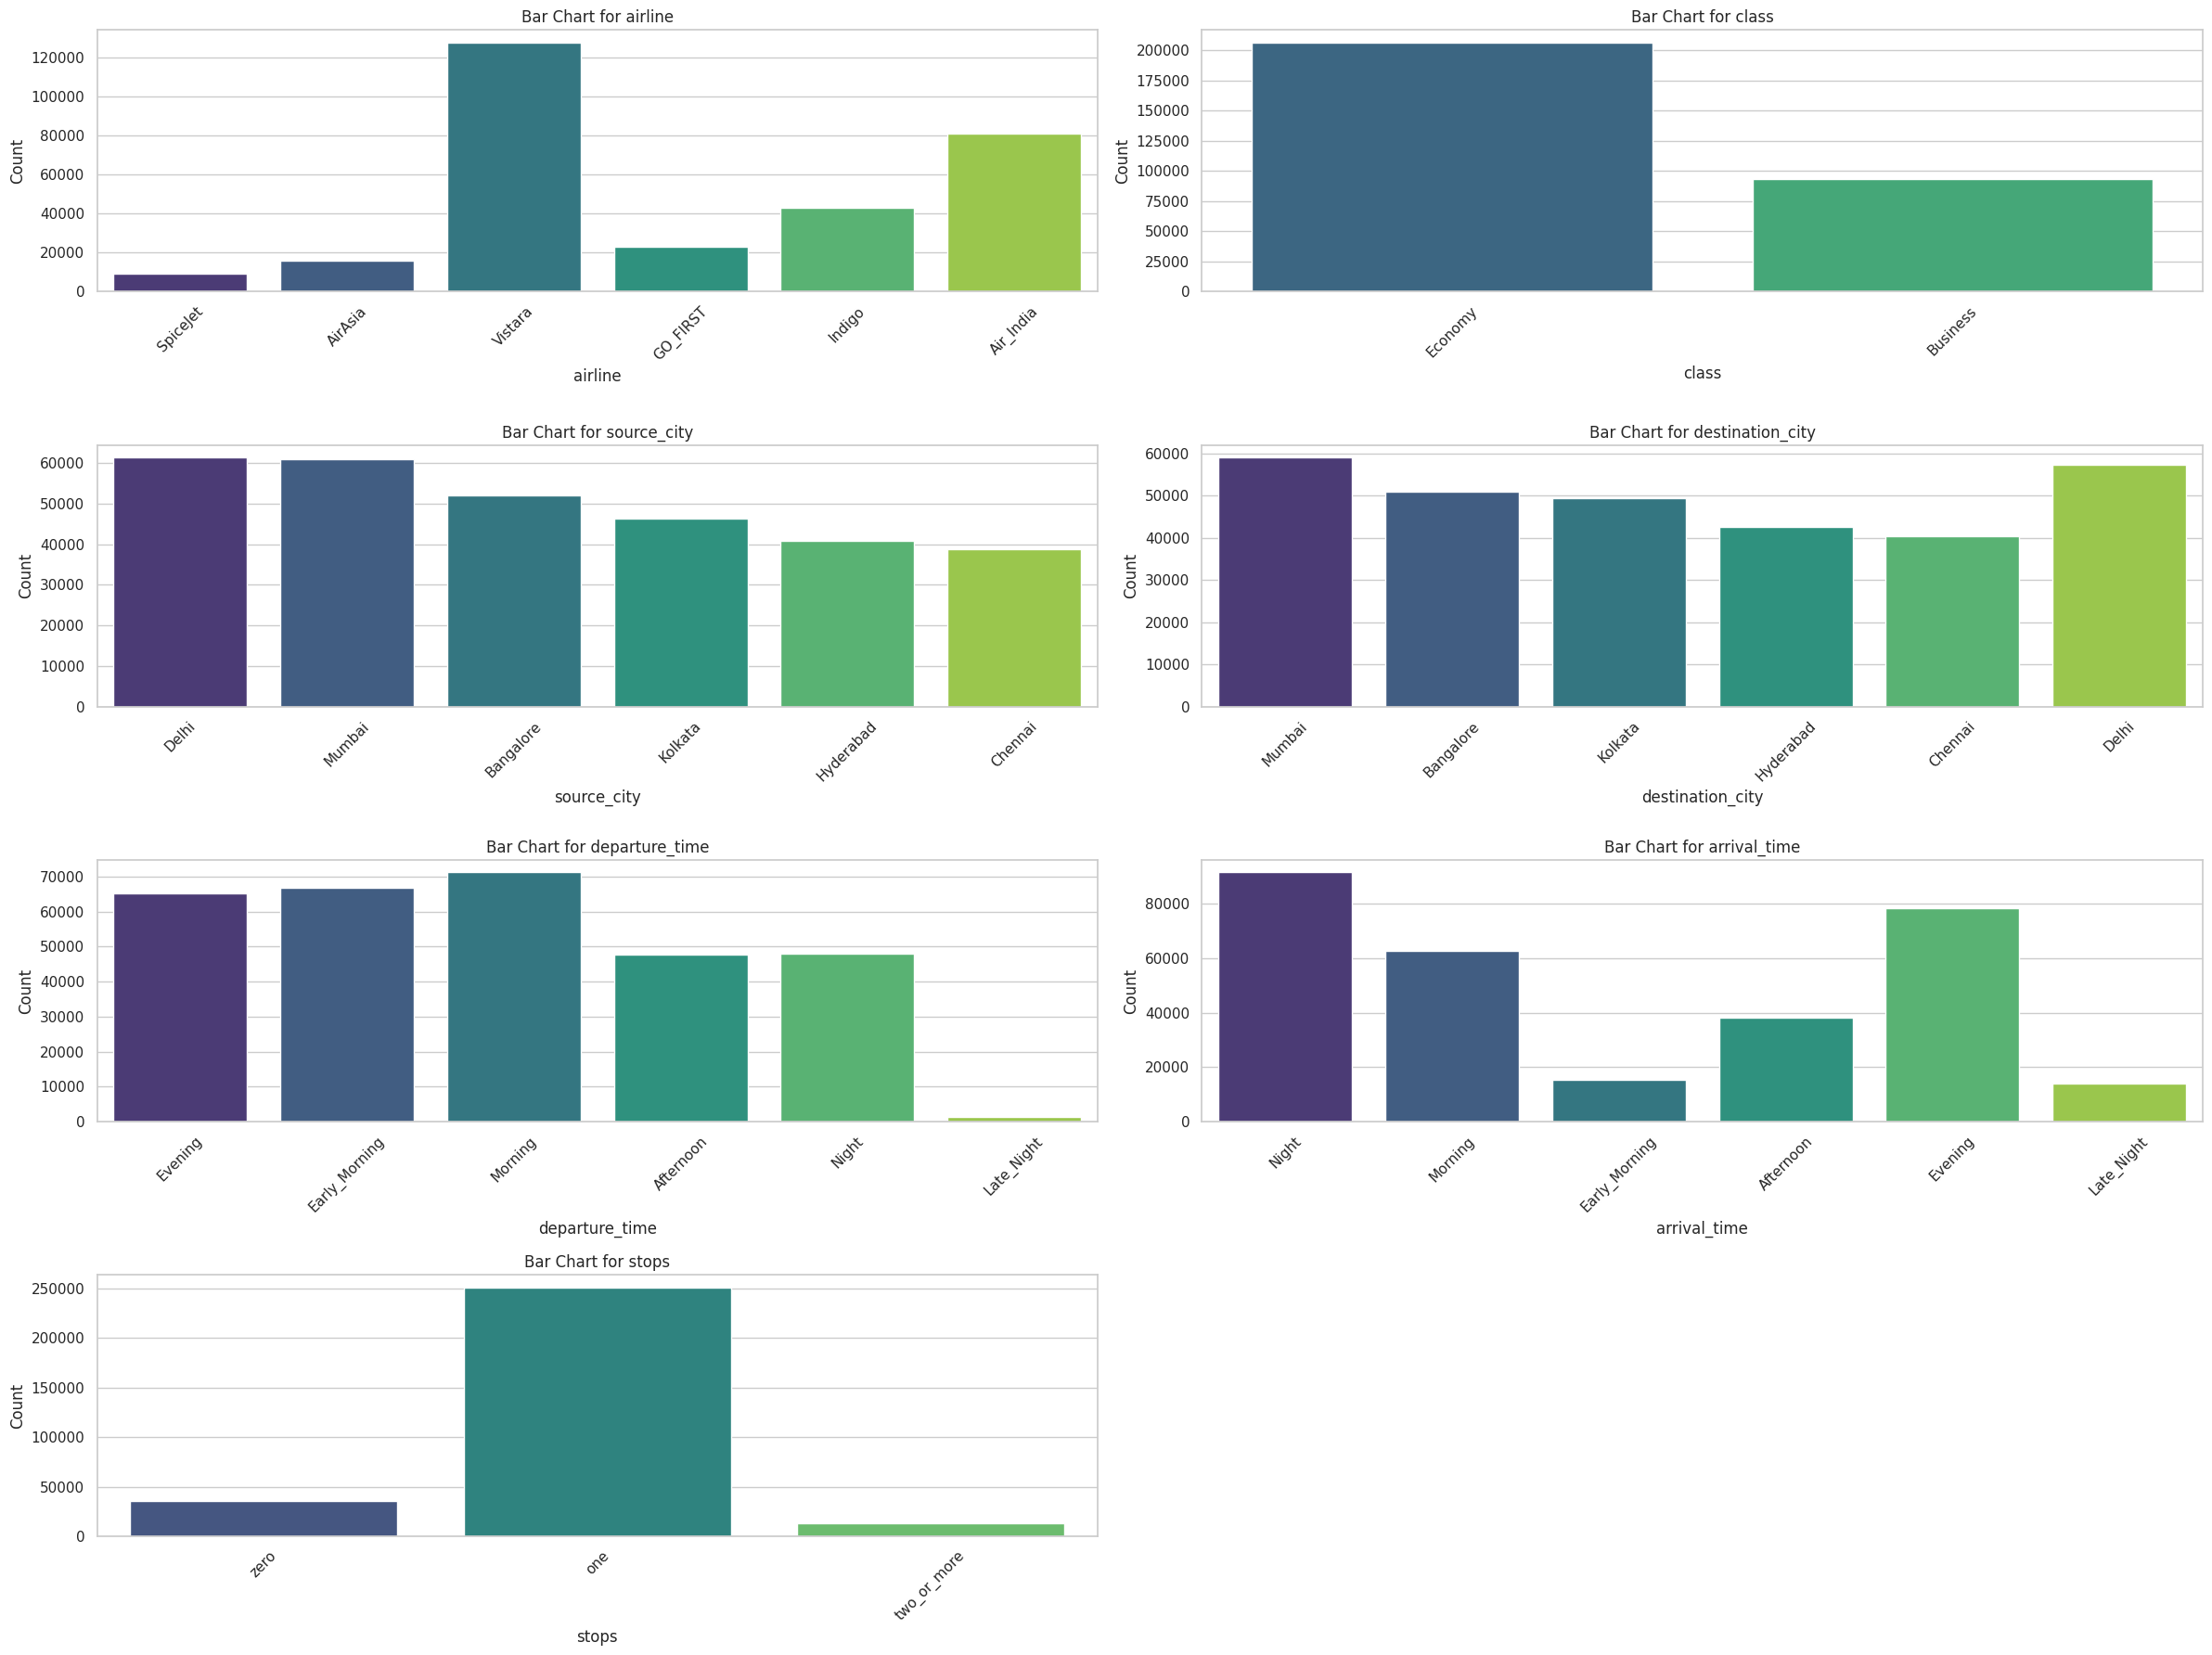

In [68]:
import math
num_cols = len(categorical_cols)
num_rows = math.ceil(num_cols / 2)  # Adjust the number of columns per row here

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for all categorical columns
plt.figure(figsize=(24, 18))
for i, column in enumerate(categorical_cols):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=data, x=column, palette="viridis")
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()

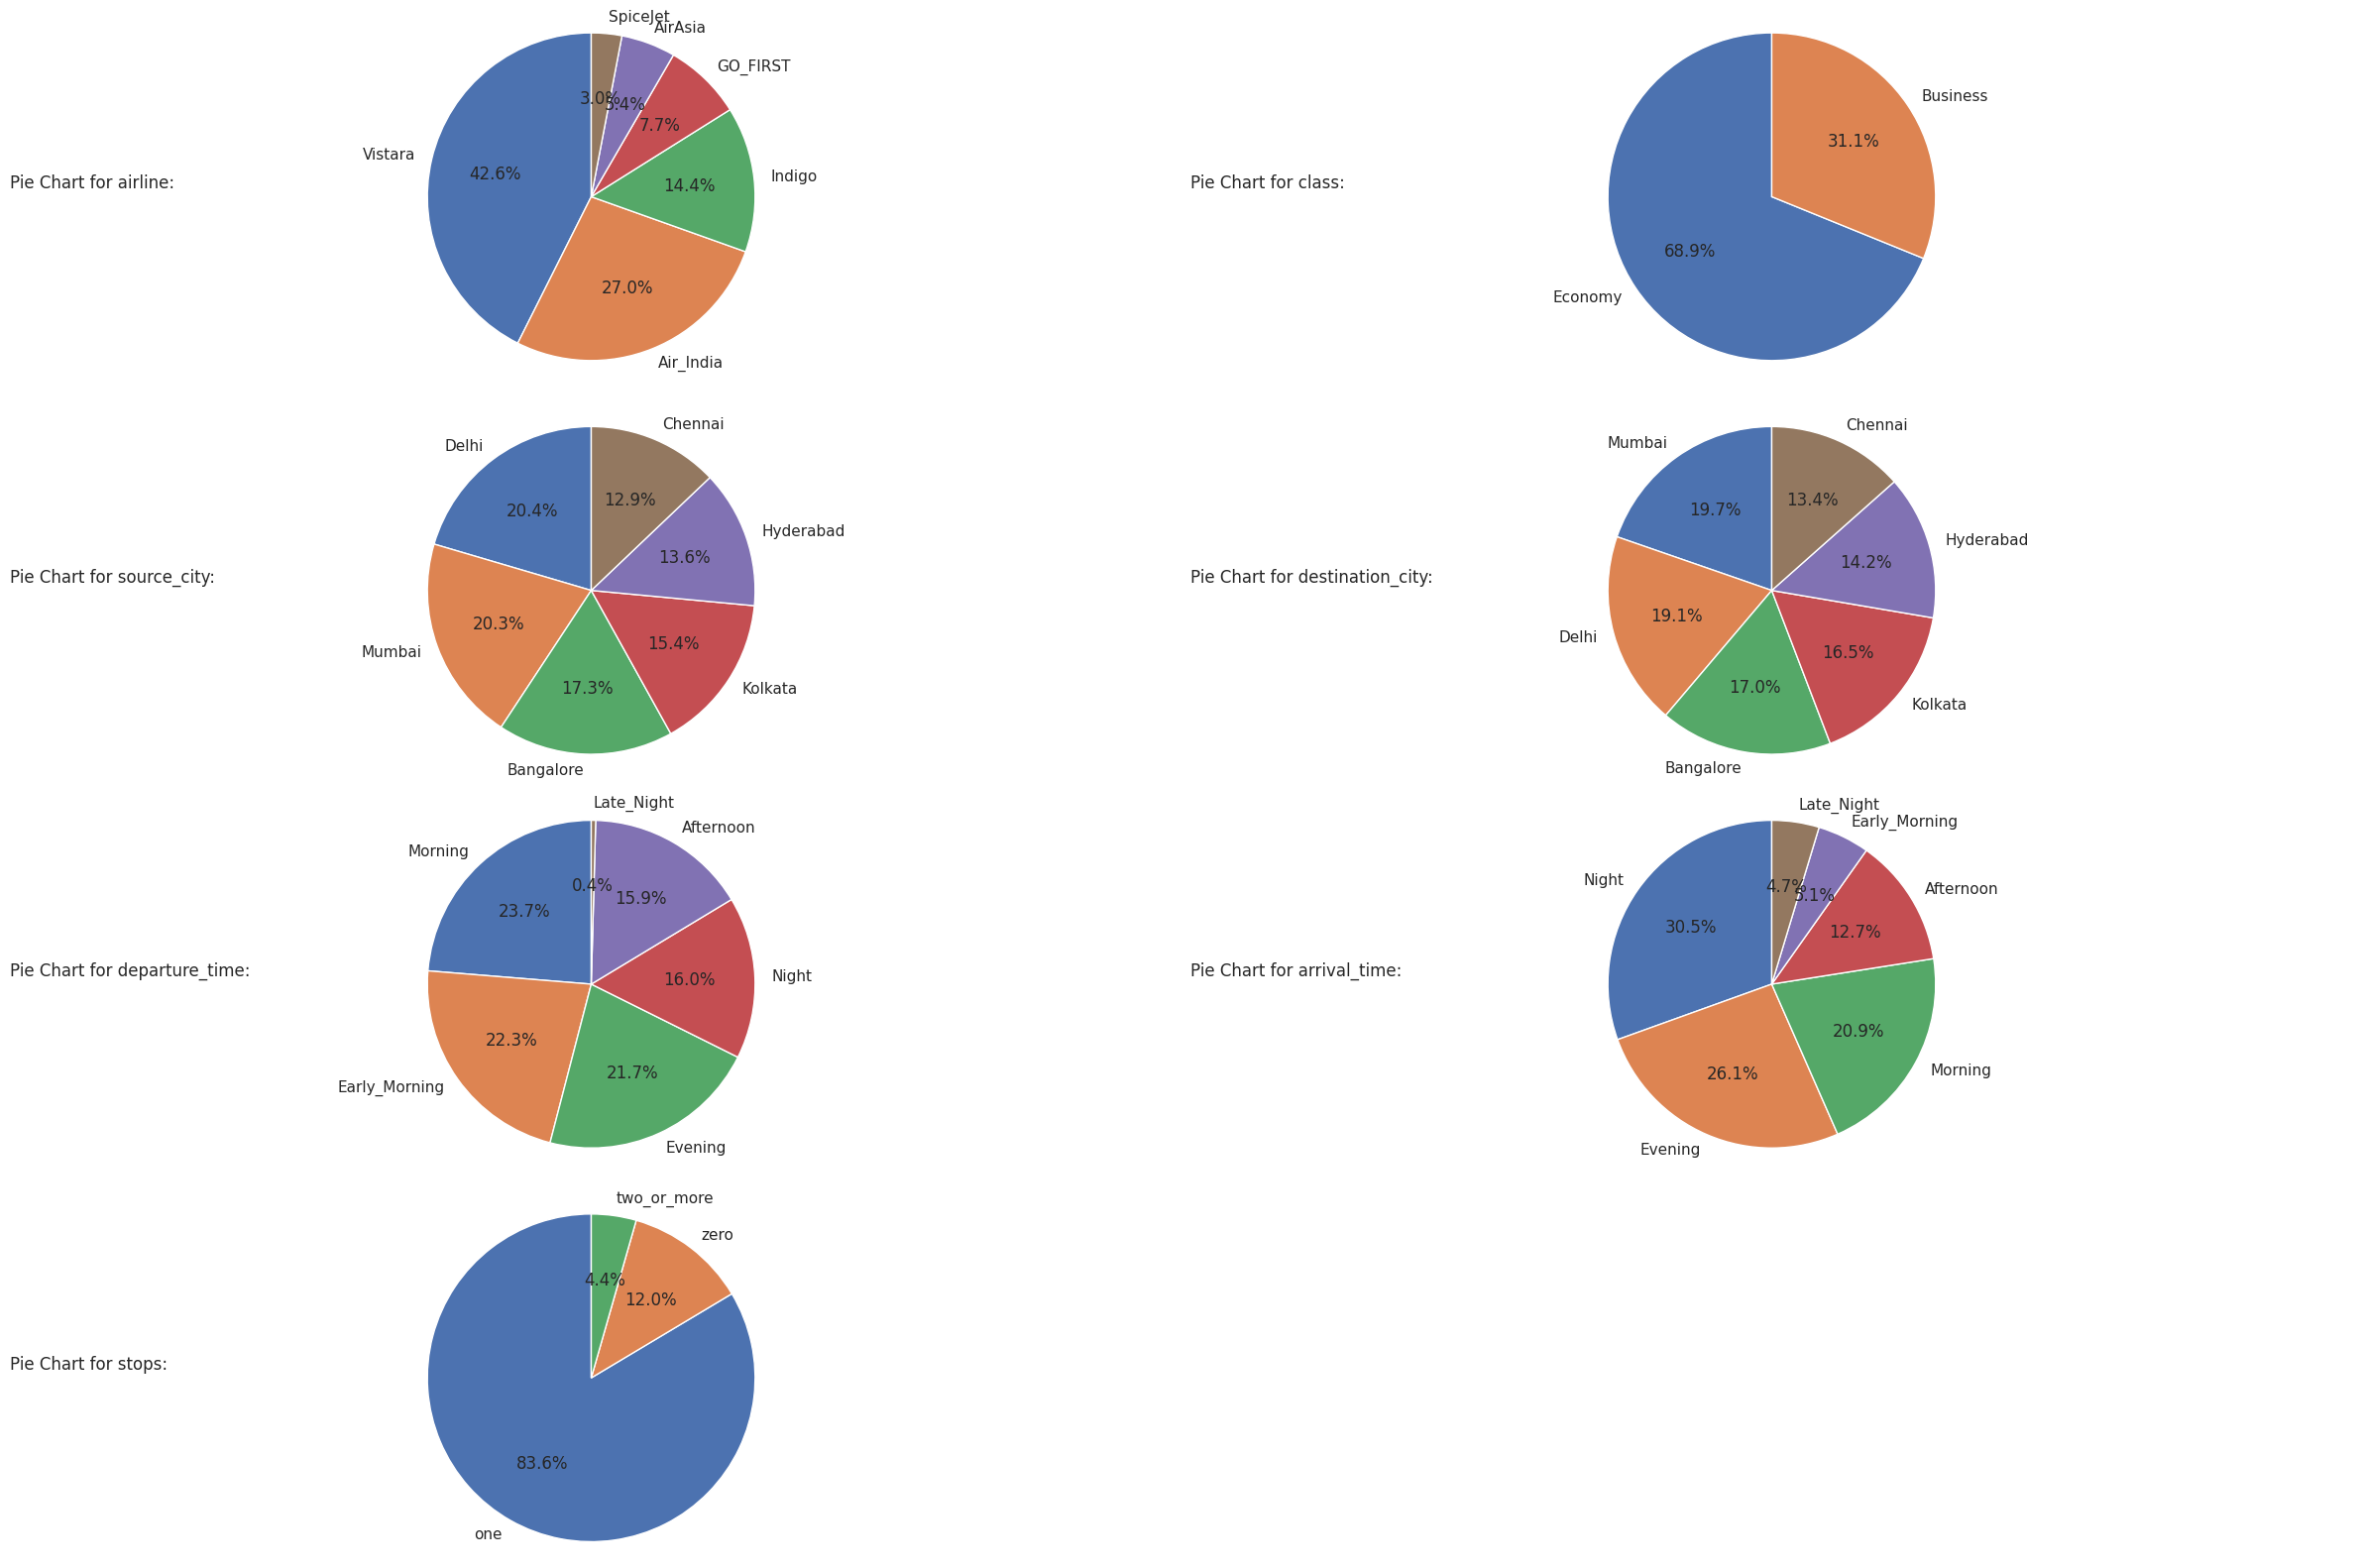

In [69]:
num_cols = 2  # Set the number of columns for the subplots
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots for pie charts
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16))
fig.subplots_adjust(hspace=3)

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Plot pie charts for each categorical column
for i, column in enumerate(categorical_cols):
    ax = axes[i // num_cols][i % num_cols]
    data[column].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart for {column}:', y=0.5, loc="left")
    ax.set_ylabel('')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Hide empty subplots
for i in range(len(categorical_cols), num_rows * num_cols):
    ax = axes[i // num_cols][i % num_cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

We can see that most of the flights are Economy calss, it justifies that the prices are relatively lows

We also notice that flights mostly have a stop which justify the durations of the flighs

Vistara and Air_India have the biggest market parts with 42,6% and 27%

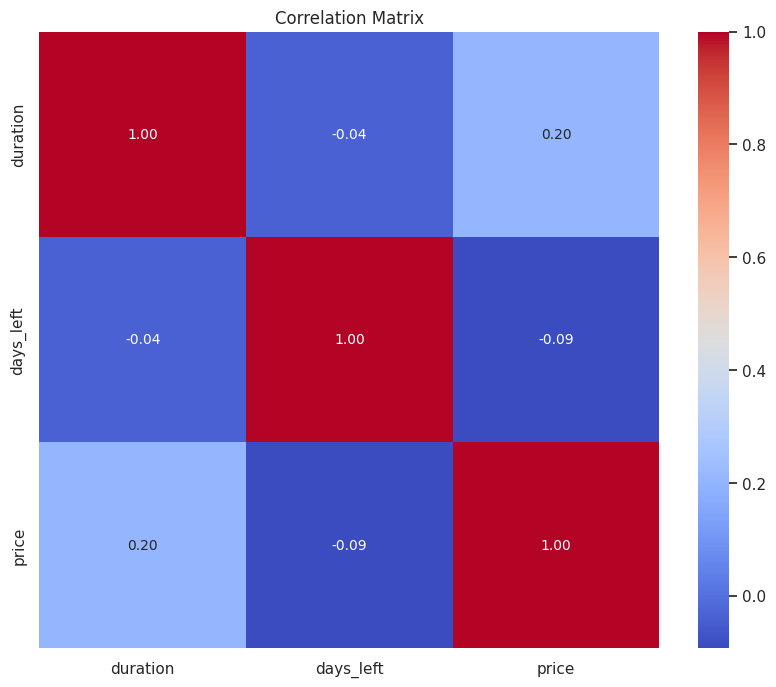

In [70]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

the numerical colums aren't lineary correlated to the price.

This is because of the importance of the categorical features in our data, since information like class departure_city, stops , airline are more important to predict the flight price

In [71]:
# Convert categorical variables into dummy variables and calculate correlations
data_dummies=pd.get_dummies(data,columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)
data_dummies.corr()

# The 'pd.get_dummies()' function transforms categorical columns into binary indicators (dummy variables).
# 'drop_first=True' is used to prevent multicollinearity by dropping the first level of each categorical variable.
# After creating these dummies, 'df.corr()' computes the correlation matrix of the entire DataFrame.
# This correlation matrix includes correlations among numerical columns and the binary dummy variables
# representing categorical information, providing insights into their relationships.

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,0.033053,-0.049719,...,0.033094,-0.107301,0.122906,-0.064458,0.061271,-0.115412,0.065762,0.061440,-0.043900,-0.138710
days_left,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,...,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,...,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,...,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,...,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,...,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,...,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,...,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.033053,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,...,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.049719,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,...,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


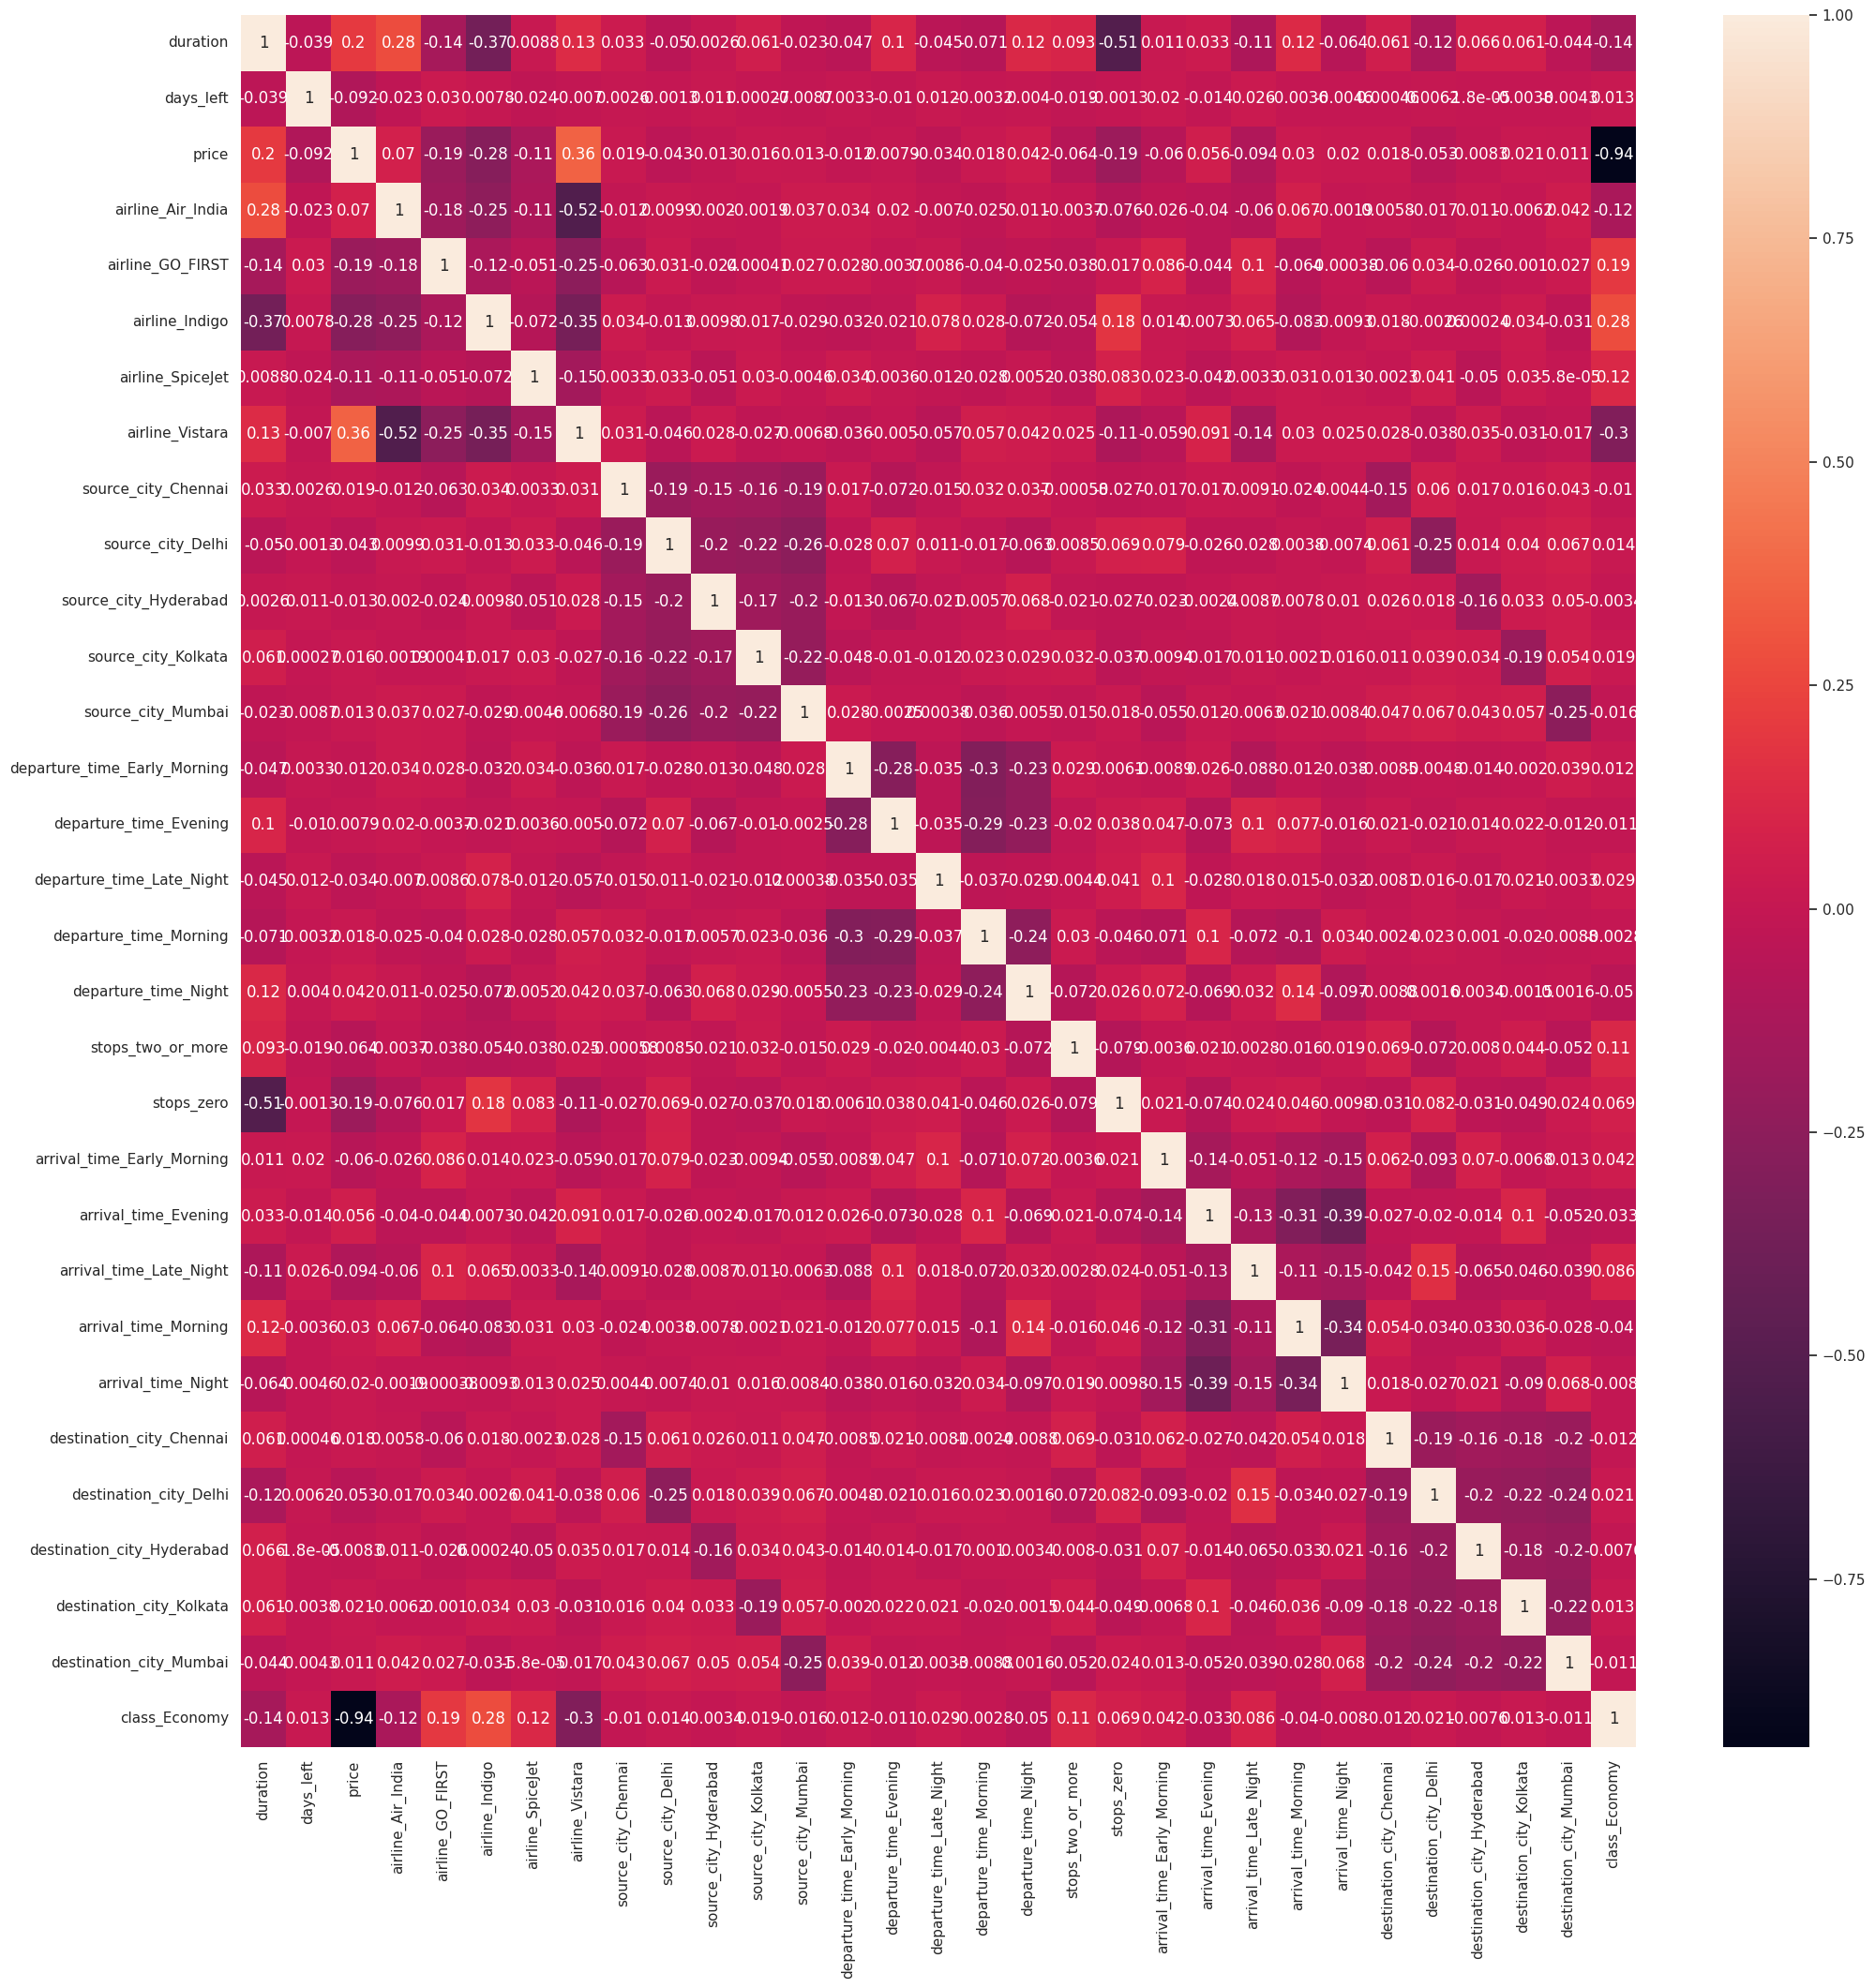

In [72]:
#plot the heatMap
plt.figure(figsize=(24,24))
sns.heatmap(data_dummies.corr(),annot=True);

In [73]:
#print features with high correlation
price_correlation = data_dummies.corr()["price"]
keys = price_correlation.keys()
correlated_features = { key:price_correlation[key] for key in keys  if abs(price_correlation[key]) >= 0.2 and key != "price"}
print(correlated_features)

{'duration': 0.20422236784543787, 'airline_Indigo': -0.28088208216949634, 'airline_Vistara': 0.3608161573520225, 'class_Economy': -0.9378603239058971}


As expected we can see correlations between the price and categorical features:

1.   Strong correlation: -0.94 between price and the economy calss
2.   moderate correlation: 0.36 between price and airline_Vistara

Note that airline_Indigo unlike, airline_Vistara, should be a lowcost airline since the correlation with price is negative and equal to **- 0.28**


#Preprocessing Pipeline

In [129]:
x=data.drop("price",axis=1)
y=data["price"]


In [130]:
oneHotEncoding_categories = ['airline', 'source_city', 'destination_city']
ordinalEncoding_categories = ['departure_time', 'arrival_time', 'stops', 'class']
numerical_categories = ["duration", "days_left"]
ordinal_categories_order = [['Late_Night', 'Afternoon', 'Night', 'Evening', 'Early_Morning', 'Morning'], ['Late_Night', 'Early_Morning', 'Afternoon', 'Night', 'Morning', 'Evening'], ['zero', 'two_or_more', 'one'], ['Economy', 'Business']]


In [131]:
Preprocessing_pipeline = ColumnTransformer([
                               ('ordinalEncoding', OrdinalEncoder(categories=ordinal_categories_order), ordinalEncoding_categories),
                               ('std_scaler', StandardScaler(), numerical_categories),
                               ('oneHotEncoding', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
                               ], remainder='passthrough')
print(Preprocessing_pipeline)


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalEncoding',
                                 OrdinalEncoder(categories=[['Late_Night',
                                                             'Afternoon',
                                                             'Night', 'Evening',
                                                             'Early_Morning',
                                                             'Morning'],
                                                            ['Late_Night',
                                                             'Early_Morning',
                                                             'Afternoon',
                                                             'Night', 'Morning',
                                                             'Evening'],
                                                            ['zero',
                                                             'two_or_more'

In [132]:
data_prepared = Preprocessing_pipeline.fit_transform(x)
#split the prepared data
x_train,x_test,y_train,y_test=train_test_split(data_prepared,y,random_state=25,train_size=0.80)

# Apply ML pipeline

##Dummy Model

In [135]:
#first test

model = DummyRegressor(strategy='mean')


# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 511270612.0037068
R-squared: -3.559201802705303e-05
error_proportion: 1.0824155748607436


          airline source_city departure_time stops   arrival_time  \
242180  Air_India      Mumbai        Morning   one        Evening   
289548    Vistara     Chennai          Night   one        Morning   
181216     Indigo     Chennai  Early_Morning   one        Morning   
185319    Vistara     Chennai        Morning   one          Night   
245768  Air_India   Bangalore      Afternoon  zero      Afternoon   
190888  Air_India     Chennai        Morning   one        Morning   
43525   Air_India      Mumbai        Morning   one          Night   
182100   GO_FIRST     Chennai  Early_Morning   one      Afternoon   
16534     Vistara       Delhi        Evening  zero        Evening   
156083     Indigo   Hyderabad        Morning   one        Evening   
190507   SpiceJet     Chennai      Afternoon   one        Evening   
257410    Vistara   Bangalore        Evening   one          Night   
256804  Air_India   Bangalore        Evening   one        Morning   
39607    GO_FIRST       Delhi     

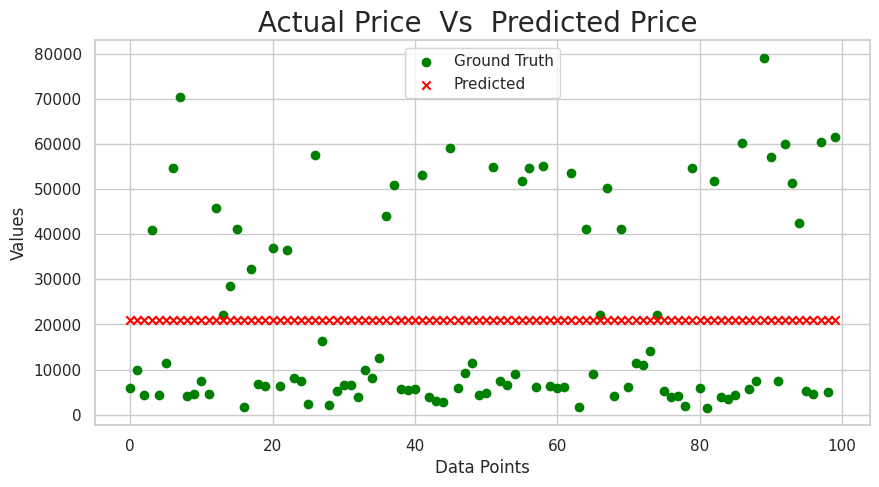

In [141]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))

# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

##Linear Regression Model

###Linear **Regression**

In [142]:
#first test

model = LinearRegression()


# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 45610928.96952824
R-squared: 0.9107858905174004
error_proportion: 0.32329804358708436


          airline source_city departure_time        stops arrival_time  \
246638    Vistara   Bangalore        Evening         zero        Night   
127344    AirAsia     Kolkata        Evening          one   Late_Night   
72424     Vistara      Mumbai        Evening          one      Evening   
91119     Vistara   Bangalore        Morning          one      Evening   
126202    Vistara     Kolkata        Evening         zero        Night   
181170  Air_India     Chennai      Afternoon          one        Night   
260134    Vistara   Bangalore        Evening          one      Morning   
78954      Indigo      Mumbai  Early_Morning          one    Afternoon   
286002  Air_India   Hyderabad          Night          one      Morning   
282338    Vistara   Hyderabad          Night          one      Morning   
45039   Air_India      Mumbai        Evening         zero        Night   
3658       Indigo       Delhi        Evening         zero      Evening   
74412    GO_FIRST      Mumbai        M

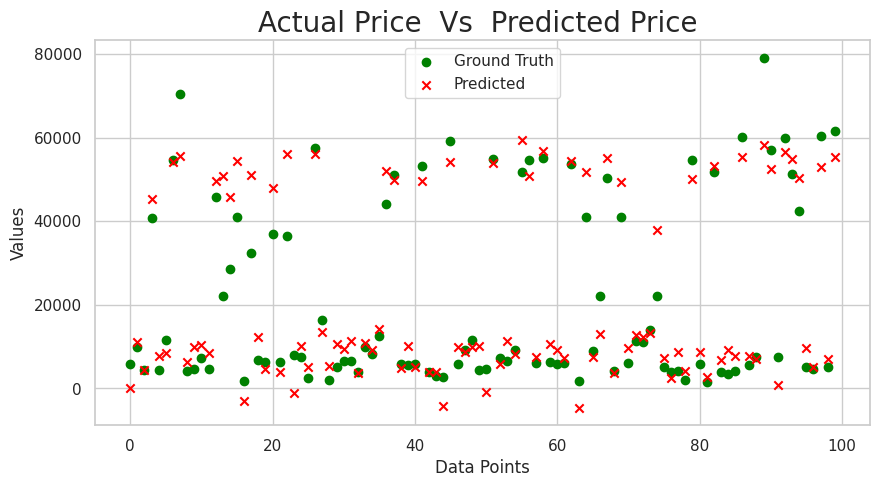

In [143]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [144]:
#cross_validation
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', LinearRegression())])
linear_regression = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(linear_regression)
mean_mse_test_set = (-1) * linear_regression["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([1.91600466, 1.83145499, 2.50234342, 1.79430103, 1.80799055,
       1.803473  , 2.46943355, 1.79898524, 1.81493688, 1.76440334]), 'score_time': array([0.15602994, 0.13763022, 0.15237522, 0.13868141, 0.14322448,
       0.1380837 , 0.1427803 , 0.15270829, 0.13794971, 0.14279056]), 'test_score': array([-2.13935206e+07, -1.60564859e+07, -1.67499036e+07, -1.56732732e+07,
       -2.25960422e+07, -1.77901355e+07, -3.41420145e+07, -1.41542014e+08,
       -1.28845531e+08, -1.09086367e+08]), 'train_score': array([-48744250.35850698, -49096038.88585893, -49053446.54470093,
       -49142276.71705203, -48923325.45920974, -49112917.06675107,
       -47153320.31020812, -36027207.43147263, -37108354.51560869,
       -38858460.93737645])}

Mean of the mean squared error over the test set: 52387528.66435619
error_proportion: 0.34648351247013465


The obtained R-squared value of 0.911 suggests that the model explains around 91.1% of the variance in the target variable using the provided features.
However, the MSE of 5481.24 indicates that the model's predictions still have some level of average deviation from the actual values

We will try to improve those metrics and apply other models

### Linear Regression with Regularization term

####Ridge

In [145]:
#first test

model = Ridge()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 45609886.78729668
R-squared: 0.9107879290060217
error_proportion: 0.3232943499832831


          airline source_city departure_time stops   arrival_time  \
281165    Vistara   Hyderabad      Afternoon   one          Night   
79327     Vistara      Mumbai          Night   one          Night   
207796  Air_India       Delhi        Morning   one          Night   
41482    GO_FIRST       Delhi        Morning   one     Late_Night   
281643    Vistara   Hyderabad      Afternoon   one          Night   
78451   Air_India      Mumbai  Early_Morning   one  Early_Morning   
156892  Air_India   Hyderabad        Morning   one        Evening   
162925    Vistara   Hyderabad        Morning   one          Night   
58120      Indigo      Mumbai  Early_Morning   one        Morning   
67966      Indigo      Mumbai        Evening   one          Night   
116134  Air_India   Bangalore  Early_Morning   one          Night   
158358     Indigo   Hyderabad      Afternoon   one     Late_Night   
231459    Vistara      Mumbai        Morning   one          Night   
201670    Vistara     Chennai     

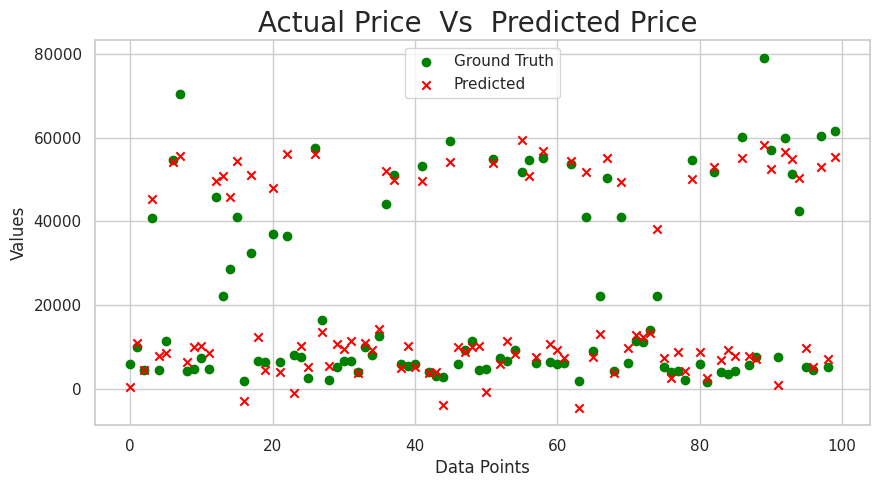

In [146]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [53]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', Ridge())])
ridge = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(ridge)
mean_mse_test_set = (-1) * ridge["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([1.28261876, 2.04211426, 1.18346667, 1.15598655, 1.1630156 ,
       1.17008877, 2.0680685 , 1.17149544, 1.18272638, 1.18447518]), 'score_time': array([0.23778105, 0.16620207, 0.15974188, 0.16377139, 0.16256928,
       0.16913581, 0.24932456, 0.15742397, 0.15554237, 0.16071272]), 'test_score': array([ -2571.18594905,  -1929.64432168,  -2013.23561797,  -1880.73769676,
        -2708.25622029,  -2137.77198148,  -4103.17513701, -17010.18025159,
       -15488.32723525, -13115.12982555]), 'train_score': array([-5857.87040748, -5900.1903183 , -5895.07385927, -5905.75769862,
       -5879.46677058, -5902.09380169, -5666.71196306, -4329.62699241,
       -4459.51258469, -4669.87068567])}

Mean of the mean squared error over the test set: 6295.764423663436
error_proportion: 0.34648378909623206


####ElasticNET

In [147]:
#first test

model = ElasticNet()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 167279228.0912421
R-squared: 0.6728050117315738
error_proportion: 0.6191410873327551


          airline source_city departure_time        stops arrival_time  \
116469    Vistara   Bangalore  Early_Morning          one        Night   
28641      Indigo       Delhi      Afternoon          one        Night   
82696      Indigo      Mumbai        Evening          one        Night   
223116  Air_India       Delhi  Early_Morning          one      Evening   
161421  Air_India   Hyderabad        Evening          one      Morning   
96105     AirAsia   Bangalore          Night          one   Late_Night   
68734   Air_India      Mumbai        Evening          one    Afternoon   
59796     Vistara      Mumbai  Early_Morning          one      Morning   
223426  Air_India       Delhi  Early_Morning          one      Morning   
217321    Vistara       Delhi      Afternoon          one      Evening   
5683    Air_India       Delhi        Evening          one        Night   
4802    Air_India       Delhi        Evening          one      Evening   
140988    Vistara     Kolkata  Early_M

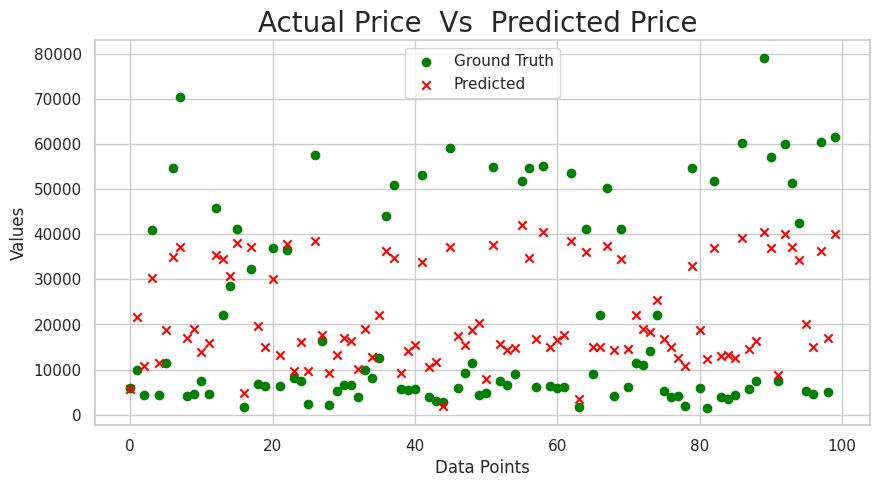

In [148]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [97]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', ElasticNet())])
elastic_net = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(elastic_net)
mean_mse_test_set = (-1) * elastic_net["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([1.60073781, 1.41036391, 1.42123556, 1.45369768, 3.17578959,
       2.18592453, 2.65073943, 4.09357119, 3.11192608, 2.04957557]), 'score_time': array([0.16049314, 0.16245723, 0.17246962, 0.16576147, 0.3579433 ,
       0.2420485 , 0.24304605, 0.53269386, 0.39422965, 0.26465917]), 'test_score': array([-8.47333003e+07, -8.22687212e+07, -1.04738429e+08, -8.38973877e+07,
       -9.10692058e+07, -1.10189398e+08, -1.19438188e+08, -5.19415352e+08,
       -6.47307068e+08, -5.39204307e+08]), 'train_score': array([-1.73474692e+08, -1.73603678e+08, -1.71790724e+08, -1.72937106e+08,
       -1.72488100e+08, -1.71988552e+08, -1.71168750e+08, -1.57723495e+08,
       -1.52685295e+08, -1.58935997e+08])}

Mean of the mean squared error over the test set: 238226135.77793974
error_proportion: 0.7388619822712281


####Lasso

In [149]:
#first test

model = Lasso()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 45610834.186945856
R-squared: 0.9107860759103288
error_proportion: 0.32329770766935517


          airline source_city departure_time        stops arrival_time  \
146820    AirAsia     Kolkata        Evening  two_or_more      Morning   
122245    AirAsia     Kolkata        Evening          one      Morning   
288255    Vistara     Chennai  Early_Morning          one      Evening   
229343    Vistara      Mumbai        Morning          one        Night   
69382   Air_India      Mumbai      Afternoon          one      Evening   
194923     Indigo     Chennai        Evening         zero      Evening   
259319    Vistara   Bangalore        Evening          one      Morning   
175459    Vistara   Hyderabad        Morning          one      Morning   
37753     Vistara       Delhi      Afternoon  two_or_more        Night   
176448  Air_India   Hyderabad        Morning  two_or_more        Night   
33180     Vistara       Delhi        Morning         zero    Afternoon   
181110     Indigo     Chennai        Morning         zero      Morning   
295014    Vistara     Chennai        M

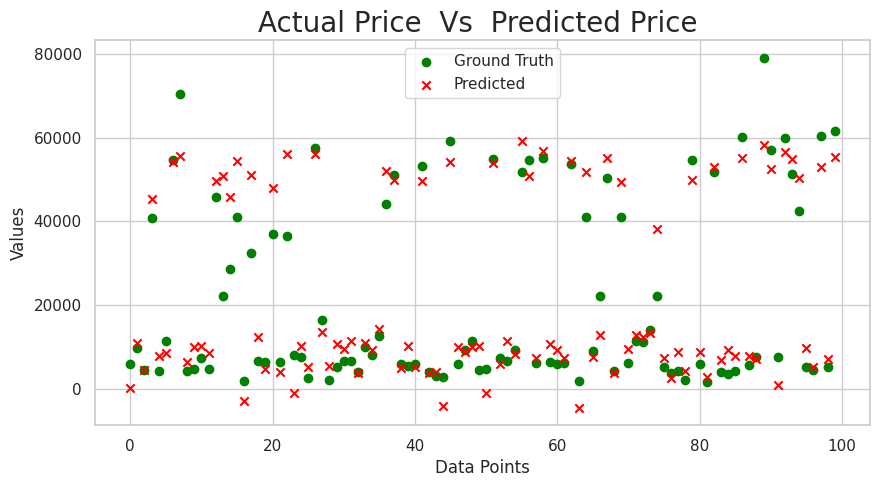

In [150]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [100]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', Lasso())])
Lasso = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(Lasso)
mean_mse_test_set = (-1) * Lasso["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([12.76655221, 12.93695855, 15.67231679, 12.47971869, 12.81982303,
       13.00604177, 13.15002489, 10.76823235,  9.15033221, 10.65146971]), 'score_time': array([0.1562438 , 0.15905881, 0.15736341, 0.15538406, 0.15644383,
       0.15853667, 0.16022587, 0.25536084, 0.16039467, 0.15832782]), 'test_score': array([-2.13154240e+07, -1.59570302e+07, -1.66589587e+07, -1.55063828e+07,
       -2.23783993e+07, -1.76531586e+07, -3.40677184e+07, -1.41658679e+08,
       -1.28992544e+08, -1.09160166e+08]), 'train_score': array([-48744777.64029188, -49096997.45543251, -49054275.48844665,
       -49143635.99309877, -48924448.80434987, -49112707.35273546,
       -47154015.76816977, -36028323.9866147 , -37109166.73955192,
       -38859550.7853531 ])}

Mean of the mean squared error over the test set: 52334846.07755296
error_proportion: 0.3463092511563248


##Non linear model


In [151]:
x_poly = x[['airline', 'class', 'stops', 'duration']]
print(x_poly)
ordinal_categories_order = [["AirAsia", "Indigo", "GO_FIRST", "SpiceJet", "Air_India", "Vistara"], ["Economy", "Business"], ["two_or_more", "one", "zero"]]
Preprocessing_pipeline = ColumnTransformer([
                               ('ordinalEncoding', OrdinalEncoder(categories=ordinal_categories_order), ['airline', 'class', 'stops']),
                               ('std_scaler', StandardScaler(), ["duration"]),
                               ], remainder='passthrough')
print(Preprocessing_pipeline)
x_poly = Preprocessing_pipeline.fit_transform(x_poly)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly_features.fit_transform(x_poly)
print(x_poly.shape)
x_poly[0]
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=25,train_size=0.80)

         airline     class stops  duration
0       SpiceJet   Economy  zero      2.17
1       SpiceJet   Economy  zero      2.33
2        AirAsia   Economy  zero      2.17
3        Vistara   Economy  zero      2.25
4        Vistara   Economy  zero      2.33
...          ...       ...   ...       ...
300148   Vistara  Business   one     10.08
300149   Vistara  Business   one     10.42
300150   Vistara  Business   one     13.83
300151   Vistara  Business   one     10.00
300152   Vistara  Business   one     10.08

[300153 rows x 4 columns]
ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalEncoding',
                                 OrdinalEncoder(categories=[['AirAsia',
                                                             'Indigo',
                                                             'GO_FIRST',
                                                             'SpiceJet',
                                                             'Air_India',

In [152]:
#first test

model = LinearRegression()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 35455929.41294561
R-squared: 0.9306488764881965
error_proportion: 0.2850447553846929


          airline source_city departure_time        stops   arrival_time  \
194298     Indigo     Chennai      Afternoon         zero      Afternoon   
158694  Air_India   Hyderabad        Morning  two_or_more        Evening   
93579     AirAsia   Bangalore  Early_Morning          one      Afternoon   
36731   Air_India       Delhi        Evening          one  Early_Morning   
89581     Vistara   Bangalore  Early_Morning          one      Afternoon   
1619       Indigo       Delhi        Morning          one        Evening   
105103     Indigo   Bangalore          Night          one  Early_Morning   
160714    Vistara   Hyderabad        Evening          one          Night   
65452     Vistara      Mumbai        Evening          one        Evening   
41819   Air_India       Delhi        Morning          one        Morning   
232427    Vistara      Mumbai        Evening          one        Morning   
133489    Vistara     Kolkata        Morning          one        Evening   
250221    Vi

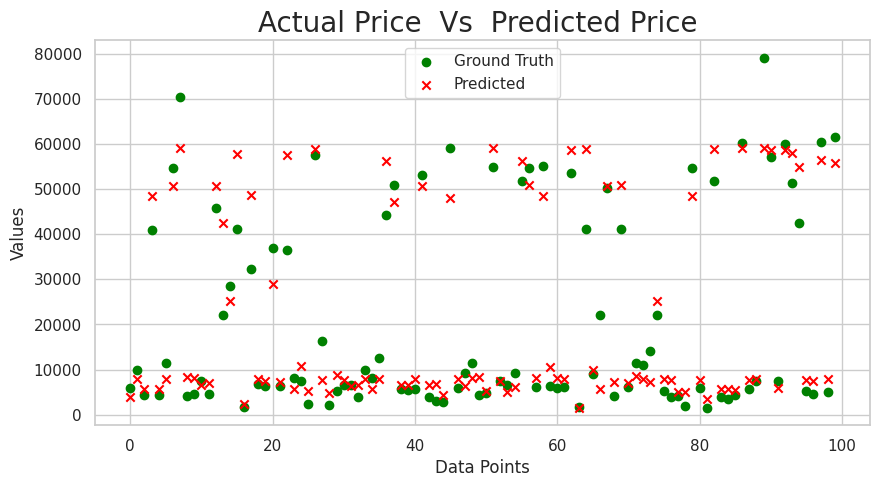

In [155]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

###ExtraTreeRegressor

In [ ]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', ExtraTreeRegressor())])
r2_ExtraTreeRegressor = cross_validate(full_pipeline, x, y, cv=10, scoring="r2", verbose=1, return_train_score=True, error_score='raise')
print(r2_ExtraTreeRegressor)
r2_ExtraTreeRegressor["test_score"].mean()

{'fit_time': array([112.35494471, 117.34368277, 114.83964419, 114.56453514,
       118.44307399, 123.01072598, 111.15566611, 120.19507885,
       115.71451902, 125.84336805]), 'score_time': array([0.06852794, 0.06728697, 0.07502675, 0.06829715, 0.07078886,
       0.07733512, 0.06893945, 0.12079883, 0.15373492, 0.06520224]), 'test_score': array([0.396958  , 0.36547543, 0.26472068, 0.48268343, 0.27547189,
       0.36620449, 0.928073  , 0.30164573, 0.32649869, 0.10908253]), 'train_score': array([0.99897475, 0.99901929, 0.99896502, 0.99900457, 0.99900521,
       0.998996  , 0.99896084, 0.99914918, 0.99922439, 0.9989503 ])}


0.3816813877886346

##KNeighborsRegressor

In [ ]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', KNeighborsRegressor())])
r2_KNeighborsRegressor = cross_validate(full_pipeline, x, y, cv=10, scoring="r2", verbose=1, return_train_score=True, error_score='raise')
print(r2_KNeighborsRegressor)
r2_KNeighborsRegressor["test_score"].mean()

{'fit_time': array([1.13409042, 0.61733079, 0.60844922, 0.62327337, 0.69182038,
       0.61038113, 0.62433815, 0.60094619, 0.61417556, 0.59795856]), 'score_time': array([58.26811981, 51.25268292, 49.72497225, 52.00072193, 53.96179628,
       49.7766993 , 49.54570484, 49.83981991, 53.08800769, 52.30291224]), 'test_score': array([-58.69047654, -62.91743723, -77.32209484, -74.41413647,
       -76.8186003 , -76.82802279,  -5.17639512,  -9.03930978,
       -12.80799775, -14.50456882]), 'train_score': array([0.9825587 , 0.98232726, 0.98244277, 0.98256531, 0.98258292,
       0.98254801, 0.98308765, 0.98257894, 0.98240077, 0.98469228])}


-46.85190396422653